Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import datetime as dt
%matplotlib inline
def leer_precios(filename):
    for k in range(10):
        df = pd.read_excel(filename,
                           skiprows = k,
                           usecols = list(range(25)))
        if df.iloc[0,0] == 'Fecha':
            df = pd.read_excel(filename,
                               skiprows = k+1,
                               usecols = list(range(25)))
            break
        
    return(df)
filenames = !ls precios/*
dfs = []
for filename in filenames:
    dfs.append(leer_precios(filename))
dfinal = pd.concat(dfs, sort = False)
dfs1 = pd.melt(dfinal,id_vars='Fecha')
dfs1.head()

,Fecha,variable,value
0,1995-07-20,0,NaN
1,1995-07-21,0,1.073
2,1995-07-22,0,1.073
3,1995-07-23,0,1.073
4,1995-07-24,0,1.000


**2.--** Compute e imprima el número de registros con datos faltantes.

In [12]:
dfs2 = dfs1[dfs1.Fecha.notnull()]
dfs2 = dfs1[dfs1.value.notnull()]
a = len (dfs1) - len(dfs2)
a


238

**3.--** Compute e imprima el número de registros duplicados.

In [13]:
dfs1['Fecha'] = pd.to_datetime(dfs1['Fecha'],infer_datetime_format=True)
dfs1 = dfs1.sort_values('Fecha', ascending = True)
dfs1['Dupli'] = dfs1['Fecha'].map(str) +'-'+ dfs1['variable'] +'-'+ dfs1['value'].map(str) 
duplicateRowsDF = dfs1[dfs1.duplicated(['Dupli'])]
len(duplicateRowsDF)

1951

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [14]:
dfs1 = dfs1[dfs1.Fecha.notnull()]
dfs1 = dfs1[dfs1.value.notnull()]
dfs1 = dfs1.drop_duplicates()
df = dfs1.copy()
len(dfs1)

199819

**5.--** Compute y grafique el precio primedio diario.

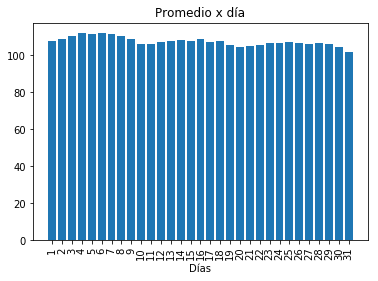

In [15]:
dfs1['Dia'] = pd.DatetimeIndex(dfs1['Fecha']).day
dfs1['Mes'] = pd.DatetimeIndex(dfs1['Fecha']).month
dfs1['Fecha'] = dfs1["Fecha"].apply( lambda dfs1 : pd.datetime(year=dfs1.year, month=dfs1.month, day=dfs1.day))	
dfs1.set_index(dfs1["Fecha"],inplace=True)
dfdia = dfs1.groupby('Dia').mean()['value']
dfmesmax = dfs1.groupby('Mes').max()['value']
dfmesmin = dfs1.groupby('Mes').min()['value']
dfmes = dfs1.groupby('Mes').mean()['value']
plt.bar(range(len(dfdia)), dfdia)
plt.xticks(range(len(dfdia)), list(dfdia.index), rotation='vertical')
plt.title('Promedio x día')
plt.xlabel('Días');

**6.--** Compute y grafique el precio máximo por mes.

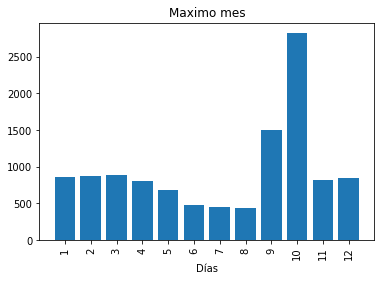

In [16]:
plt.bar(range(len(dfmesmax)), dfmesmax)
plt.xticks(range(len(dfmesmax)), list(dfmesmax.index), rotation='vertical')
plt.title('Maximo mes')
plt.xlabel('Días');

**7.--** Compute y grafique el precio mínimo mensual.

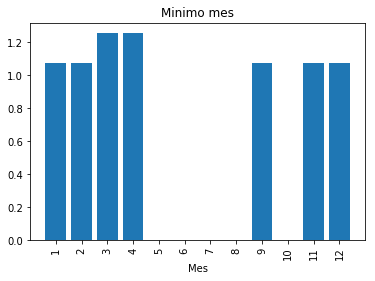

In [17]:
plt.bar(range(len(dfmesmin)), dfmesmin)
plt.xticks(range(len(dfmesmin)), list(dfmesmin.index), rotation='vertical')
plt.title('Minimo mes')
plt.xlabel('Mes');

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

Text(0.5, 0, 'Precio máximo')

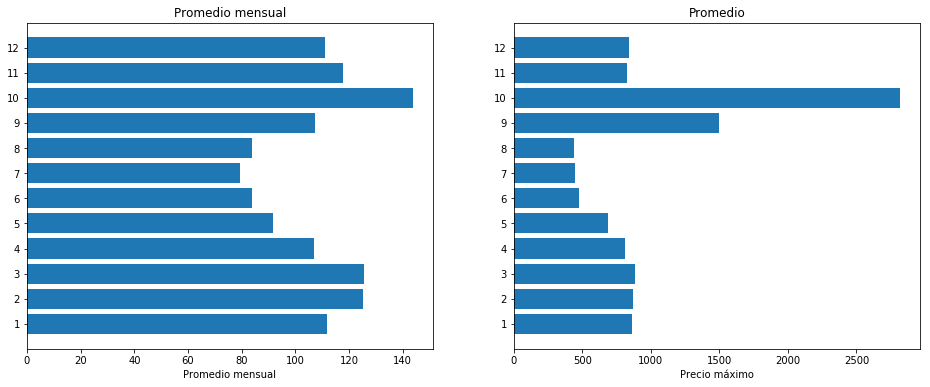

In [18]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.barh(range(len(dfmes)), dfmes)
plt.yticks(range(len(dfmes)), list(dfmes.index), rotation='horizontal')
plt.title('Promedio mensual')
plt.xlabel('Promedio mensual')
plt.subplot(1, 2, 2)
plt.barh(range(len(dfmesmax)), dfmesmax)
plt.yticks(range(len(dfmesmax)), list(dfmesmax.index), rotation='horizontal')
plt.title('Promedio')
plt.xlabel('Precio máximo')

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [19]:
DatosPorDia = df.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Dia'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
ListaDeDiasHabiles = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
DataFramePorDiasLaborarles = DatosPorDia[(DatosPorDia['Dia'] == 'Monday') | (DatosPorDia['Dia'] == 'Tuesday')| (DatosPorDia['Dia'] == 'Wednesday')| (DatosPorDia['Dia'] == 'Thursday')| (DatosPorDia['Dia'] == 'Friday')]
DataFrameAgrupadoPorFecha = DataFramePorDiasLaborarles.groupby('Fecha').agg({'value': np.max}) 

DataFrameAgrupadoPorFecha.reset_index(inplace=True)
DataFramesMerge = pd.merge(DataFramePorDiasLaborarles, DataFrameAgrupadoPorFecha, on=['Fecha','value'], how='inner')


Text(0, 0.5, 'Numero de ocurrencias')

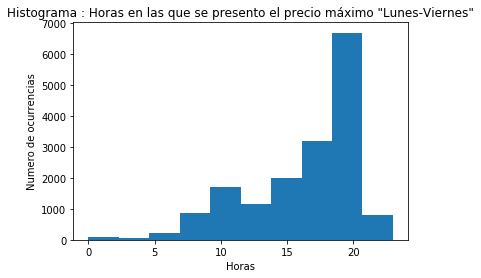

In [20]:
ListaDeHoras = list(map(int,DataFramesMerge['variable'].tolist()))
plt.hist(ListaDeHoras)
plt.title('Histograma : Horas en las que se presento el precio máximo "Lunes-Viernes"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

In [21]:
DatosPorDia = df.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Dia'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
DataFramePorDiaSabado = DatosPorDia[(DatosPorDia['Dia'] == 'Saturday') ]
DataFrameAgrupadoPorFecha = DataFramePorDiaSabado.groupby('Fecha').agg({'value': np.max}) 
DataFrameAgrupadoPorFecha.reset_index(inplace=True)
DataFramesMerge = pd.merge(DataFramePorDiaSabado, DataFrameAgrupadoPorFecha, on=['Fecha','value'], how='inner')


Text(0, 0.5, 'Numero de ocurrencias')

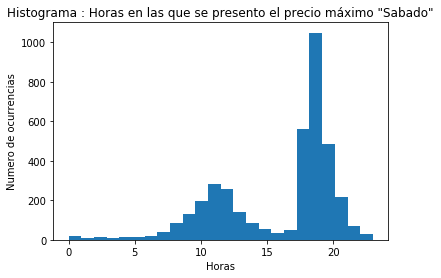

In [22]:
ListaDeHoras = list(map(int,DataFramesMerge['variable'].tolist()))
plt.hist(ListaDeHoras, bins=24)
plt.title('Histograma : Horas en las que se presento el precio máximo "Sabado"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

In [23]:
DatosPorDia = df.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Dia'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
DataFramePorDiaDomingo = DatosPorDia[(DatosPorDia['Dia'] == 'Sunday') ]
DataFrameAgrupadoPorFecha = DataFramePorDiaDomingo.groupby('Fecha').agg({'value': np.max}) 
DataFrameAgrupadoPorFecha.reset_index(inplace=True)
DataFramesMerge = pd.merge(DataFramePorDiaDomingo, DataFrameAgrupadoPorFecha, on=['Fecha','value'], how='inner')

Text(0, 0.5, 'Numero de ocurrencias')

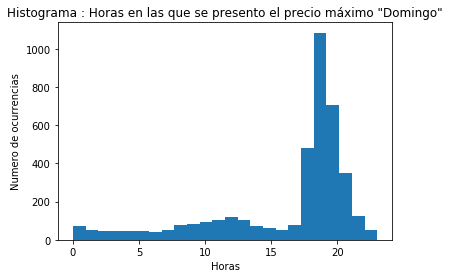

In [24]:
ListaDeHoras = list(map(int,DataFramesMerge['variable'].tolist()))
plt.hist(ListaDeHoras, bins=24)
plt.title('Histograma : Horas en las que se presento el precio máximo "Domingo"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [25]:
DatosPorDia = df.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Year'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%Y'), axis=1)
DataFrameAgrupadoPorFecha = DatosPorDia.groupby('Year').agg({'value': np.min}) 
DataFrameAgrupadoPorFecha.reset_index(inplace=True)
DataFrameAgrupadoPorFecha.columns = ["Year","MinPrecio"]
DataFramesMerge = pd.merge(DataFrameAgrupadoPorFecha, DatosPorDia, on = ['Year'], how ='inner')
DataFramesMerge = DataFramesMerge[(DataFramesMerge['MinPrecio'] == DataFramesMerge['value'])]
# DataFramesMerge = DataFramesMerge[DataFramesMerge.MinPrecio != 0]
DataFramesMerge = DataFramesMerge[['Fecha','MinPrecio']].drop_duplicates(subset='MinPrecio', keep="first")
DataFramesMerge.tail()

,Fecha,MinPrecio
162005,2014-01-11,38.941951
170656,2015-01-06,46.791501
187507,2016-12-09,61.100689
190123,2017-03-28,60.312095
199104,2018-04-06,61.457224


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 1440x1440 with 0 Axes>

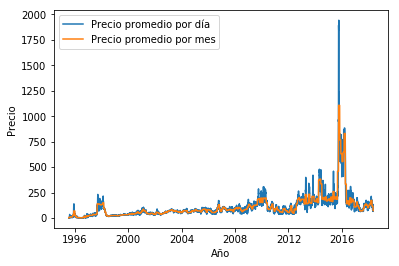

In [26]:
DatosPorMesPromedio = df.copy()
DatosPorMesPromedio['Fecha'] = pd.to_datetime(DatosPorMesPromedio['Fecha'])
DatosPorMesPromedio['Mes'] =  DatosPorMesPromedio[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)
DatosPorMesPromedio['year'] =  DatosPorMesPromedio[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%Y'), axis=1)
DatosPorMesYear = DatosPorMesPromedio.groupby(['Mes','year']).agg({'value': np.mean}) 
DatosPorMesYear.reset_index(inplace=True)
DatosPorMesYear.columns = ['Mes','year','PromedioPorMes']

DataFramesMerge = pd.merge(DatosPorMesYear, DatosPorMesPromedio, on = ['Mes','year'], how ='inner')

DatosPorDia = df.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia = DatosPorDia.groupby('Fecha').agg({'value': np.mean}) 
DatosPorDia.reset_index(inplace=True)
DatosPorDia.columns = ['Fecha','PrecioPorDia']

DataFramesMerge = pd.merge(DatosPorMesYear, DatosPorMesPromedio, on = ['Mes','year'], how ='inner')
DataFramesMerge = pd.merge(DataFramesMerge, DatosPorDia, on = ['Fecha'], how ='inner')
DataFrameHaGraficar = DataFramesMerge.groupby('Fecha').agg({'PrecioPorDia': np.mean,'PromedioPorMes': np.mean}) 

plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot((DataFrameHaGraficar.index.tolist()), DataFrameHaGraficar['PrecioPorDia'], label="Precio promedio por día")
ax.plot((DataFrameHaGraficar.index.tolist()), DataFrameHaGraficar['PromedioPorMes'], label="Precio promedio por mes")
plt.xlabel("Año")
plt.ylabel("Precio")

ax.legend()


---